# Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:

Obtener datos de tendencia de twitter o facebook(crawler o webscraping), para ello se puede obtener a través del API.

Title: Titulo del Post/TwitterWord 

count: la cantidad de palabras del artículo

\# of Links: los enlaces externos que contiene

\# of comments: cantidad de comentarios

\# Shares: compartidos.HashTagEtc.

En base a ello, se pretende proponer y generar una predicción de cuántas veces será compartido un post/twitter utilizando regresión.

Para la obtencion de datos y generar el dataset trabaje con una libreria llamada tweepy la cual nos permite trabajar en conjunto con la API de Tweeter, para ello debemos tener una cuenta de desarrollador y generar una key con la cual obtendremos la informacion.

Hay que toma en cuenta que si no se tiene instalado se debe ejecutar "!pip install tweepy".

Esta libreria nos retorna un json en donde nostros por medio de una funcion debemos transformalo a un CSV, ya que es mucho mas facil trabjar con ese tipo de archivos

In [2]:
#importamos la libreria y json para poder trabajar con la informaicon que obtenemos
import tweepy,json

In [3]:
#En este punto ingresamos el token y key que nos genero al momento de crear una app en twtitter

access_token="471944707-4Yt2hcsrdnDbbS3K5uUDg1LW6ZPSMt9BLUdyRliX"
access_token_secret="JT1QMhK20INz9yorTeXiOO39whdAuxZRWNqO0H5EhVVPt"
consumer_key="KQJ3Lc1BPf0gWKwBGbMiHujkl"
consumer_secret="JwZwyeeE1xe5i0EUIulGiR34i1ITRUejS1XjYxCMPjGxYql7j0"
auth= tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
numero_tweets=1000

#Ahora generamos un metodo en el cual obtendremos la informacion de los tweets ademas generaremos el CSV
#es decir que lo almacenaremos como en un diccionario

tweet_list=[]
class MyStreamListener(tweepy.StreamListener):
    def __init__(self,api=None):
        super(MyStreamListener,self).__init__()
        self.num_tweets=0
        self.file=open("tweet.txt","w")
    def on_status(self,status):
        tweet=status._json
        self.file.write(json.dumps(tweet)+ '\n')
        tweet_list.append(status)
        self.num_tweets+=1
        if self.num_tweets<numero_tweets:
            return True
        else:
            return False
        self.file.close()
l = MyStreamListener()
stream =tweepy.Stream(auth,l)
#En esta linea filtramos la informacion que vamos a obenter
stream.filter(track=['LassoGuillermo'])


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [14]:
df=pd.read_csv('lasso_tweets.csv', index_col=False)
df = df[df.Text.notna()]
df.head(20)

,UserName,Handle,Timestamp,Text,Comments,Likes,Retweets
0,Guillermo Lasso,@LassoGuillermo,2021-05-29T21:35:01.000Z,¡Felicidades \n@MorejonGlenda\n! Ella y más de...,24,153,762
1,Guillermo Lasso,@LassoGuillermo,2021-05-28T23:57:43.000Z,¡Una buena noticia!\n@EmbajadaChinaEc\n me inf...,628,"1,6 mil","10,5 mil"
2,Guillermo Lasso,@LassoGuillermo,2021-05-28T22:23:22.000Z,¡Primera visita a Guayas! Nos reunimos en la G...,134,398,2 mil
3,Guillermo Lasso,@LassoGuillermo,2021-05-26T16:59:31.000Z,Los invito a acompañarnos en este emotivo even...,108,293,"1,1 mil"
4,Guillermo Lasso,@LassoGuillermo,2021-05-26T15:37:41.000Z,FAMILIA.\n\n#JuntosLoLogramos,703,"1,4 mil","16,7 mil"
5,Guillermo Lasso,@LassoGuillermo,2021-05-26T13:40:49.000Z,Nuestro proyecto de Ley Orgánica de Libre Expr...,268,599,2 mil
6,Guillermo Lasso,@LassoGuillermo,2021-05-26T04:32:57.000Z,Hoy envié a la Asamblea Nacional el proyecto d...,498,1 mil,5 mil
7,Presidencia ECU,@Presidencia_Ec,2021-05-25T21:48:41.000Z,"El presidente \n@LassoGuillermo\n, durante su ...",167,558,"4,5 mil"
8,Guillermo Lasso,@LassoGuillermo,2021-05-25T20:04:59.000Z,Hoy tuve la oportunidad de dialogar con \n@leo...,580,878,"4,3 mil"
9,Guillermo Lasso,@LassoGuillermo,2021-05-25T16:16:52.000Z,Fue un honor recibir a representantes de \n@US...,207,638,"2,9 mil"


In [15]:
df.Comments = df.Comments.replace([r'[ mil]+$',','], ['00',''], regex=True)
df.Likes = df.Likes.replace([r'[ mil]+$',','], ['00',''], regex=True)
df.Retweets = df.Retweets.replace([r'[ mil]+$',','], ['00',''], regex=True)
df.Text = df.Text.replace([r'Citar Tweet'], [' Citar Tweet'], regex=True)


df['NumHashtags'] = df.Text.str.findall(r'#.*?(?=\s|$)').str.len()
df['WordCount']= df.Text.apply(lambda x: len(x.split()))
df['NumLinks'] = df.Text.apply(lambda x: 1 if str(x).find('Citar Tweet') != -1 else 0)

df = df.astype({"Comments": float, "Likes": float, "Retweets": float,"NumHashtags": float, "WordCount": float, "NumLinks": float})

In [10]:
df.head(20)

,UserName,Handle,Timestamp,Text,Comments,Likes,Retweets,NumHashtags,WordCount,NumLinks
0,Guillermo Lasso,@LassoGuillermo,2021-05-29T21:35:01.000Z,¡Felicidades \n@MorejonGlenda\n! Ella y más de...,24.0,153.0,762.0,4.0,69.0,1.0
1,Guillermo Lasso,@LassoGuillermo,2021-05-28T23:57:43.000Z,¡Una buena noticia!\n@EmbajadaChinaEc\n me inf...,628.0,1600.0,10500.0,2.0,34.0,0.0
2,Guillermo Lasso,@LassoGuillermo,2021-05-28T22:23:22.000Z,¡Primera visita a Guayas! Nos reunimos en la G...,134.0,398.0,200.0,1.0,33.0,0.0
3,Guillermo Lasso,@LassoGuillermo,2021-05-26T16:59:31.000Z,Los invito a acompañarnos en este emotivo even...,108.0,293.0,1100.0,4.0,73.0,1.0
4,Guillermo Lasso,@LassoGuillermo,2021-05-26T15:37:41.000Z,FAMILIA.\n\n#JuntosLoLogramos,703.0,1400.0,16700.0,1.0,2.0,0.0
5,Guillermo Lasso,@LassoGuillermo,2021-05-26T13:40:49.000Z,Nuestro proyecto de Ley Orgánica de Libre Expr...,268.0,599.0,200.0,2.0,28.0,0.0
6,Guillermo Lasso,@LassoGuillermo,2021-05-26T04:32:57.000Z,Hoy envié a la Asamblea Nacional el proyecto d...,498.0,100.0,500.0,2.0,35.0,0.0
7,Presidencia ECU,@Presidencia_Ec,2021-05-25T21:48:41.000Z,"El presidente \n@LassoGuillermo\n, durante su ...",167.0,558.0,4500.0,1.0,35.0,0.0
8,Guillermo Lasso,@LassoGuillermo,2021-05-25T20:04:59.000Z,Hoy tuve la oportunidad de dialogar con \n@leo...,580.0,878.0,4300.0,2.0,35.0,0.0
9,Guillermo Lasso,@LassoGuillermo,2021-05-25T16:16:52.000Z,Fue un honor recibir a representantes de \n@US...,207.0,638.0,2900.0,2.0,38.0,0.0


In [16]:
df.describe()

,Comments,Likes,Retweets,NumHashtags,WordCount,NumLinks
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,237.506024,560.050602,2871.626506,0.674699,37.479518,0.101205
std,266.421127,598.315199,3317.491836,0.996472,16.712948,0.301964
min,12.000000,26.000000,100.000000,0.000000,1.000000,0.000000
25%,84.500000,225.000000,885.500000,0.000000,29.000000,0.000000
50%,152.000000,380.000000,1800.000000,1.000000,37.000000,0.000000
75%,261.500000,640.500000,3600.000000,1.000000,43.000000,0.000000
max,3100.000000,5700.000000,26400.000000,14.000000,104.000000,1.000000


# Regresion lineal

In [19]:
x = df[['Comments', 'Likes','NumHashtags','WordCount','NumLinks']]
y = df['Retweets'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

#Training: Regresion Lineal
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

b=regressor.intercept_
m=regressor.coef_

### Prediccion generada

In [20]:
y_pred = regressor.predict(X_test)  

df1 = pd.DataFrame({'Actual': y_test.flatten().astype(float), 'Predicted': y_pred.flatten()}) 

df1 

,Actual,Predicted
0,1500.0,1679.162390
1,1700.0,1420.848311
2,4400.0,5331.171275
3,400.0,2005.747228
4,987.0,1299.285088
...,...,...
78,1100.0,1516.660907
79,1400.0,1783.527359
80,100.0,1296.193565
81,801.0,1472.544984


### Presicion del modelo

In [21]:
preRF=r2_score(y_test,y_pred)
print("Precisión del modelo: ", preRF) 

Precisión del modelo:  0.7538923611035449


### Grafica de regresion lineal

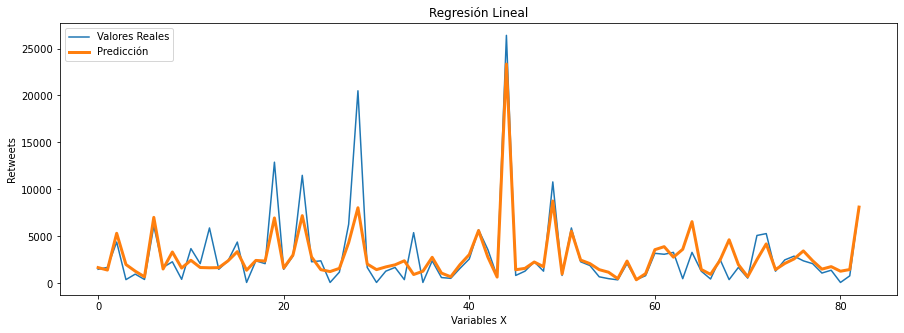

In [22]:
plt.figure(figsize = (15,5))

X = np.arange(len(y_test))
y = df['Retweets'].values.reshape(-1,1)

plt.plot(X, df1['Actual'],'-', label ='Valores Reales')
plt.plot(X, df1['Predicted'], '-', label = 'Predicción', linewidth = 3)

plt.title('Regresión Lineal') 
plt.xlabel('Variables X')
plt.ylabel('Retweets')
plt.legend(loc="upper left") 

plt.show()

# Regresion Polinomial

In [23]:
x = df[['Comments', 'Likes','NumHashtags','WordCount','NumLinks']]
y = df['Retweets'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

### Prediccion

In [24]:
y_pred2 = pol_reg.predict(poly_reg.fit_transform(X_test)) 
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred2.flatten()}) 
df2

,Actual,Predicted
0,1900.0,3074.689352
1,4700.0,4446.889230
2,800.0,3059.121322
3,1900.0,805.221171
4,258.0,2826.403092
...,...,...
78,1700.0,1730.865705
79,924.0,768.109506
80,4500.0,2591.882273
81,400.0,4180.090350


### Presicion del Modelo

In [25]:
preRF=r2_score(y_test,y_pred2)
print("Precisión del modelo: ", preRF)

Precisión del modelo:  0.8873203833953147


### Grafica polinomial

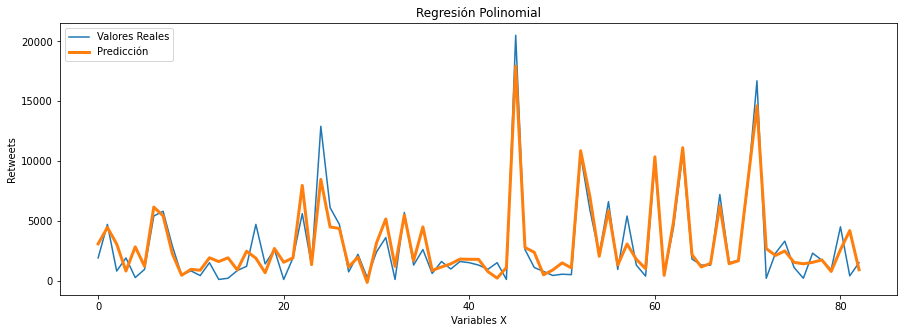

In [26]:
plt.figure(figsize = (15,5))

X = np.arange(len(y_test))
y = df['Retweets'].values.reshape(-1,1)

plt.plot(X, df2['Actual'],'-', label ='Valores Reales')
plt.plot(X, df2['Predicted'], '-', label = 'Predicción', linewidth = 3)

plt.title('Regresión Polinomial') 
plt.xlabel('Variables X')
plt.ylabel('Retweets')
plt.legend(loc="upper left") 

plt.show()

# Cuantas veces se hará Re-tweet de un tweet (prediccion)  

In [27]:
# Tweet a predecir
df[50:51]

,UserName,Handle,Timestamp,Text,Comments,Likes,Retweets,NumHashtags,WordCount,NumLinks
50,Guillermo Lasso,@LassoGuillermo,2021-05-12T16:37:17.000Z,La vacunación es prioridad. Vamos a firmar un ...,842.0,1700.0,10900.0,0.0,44.0,0.0


In [28]:
xTest = df[200:201][['Comments', 'Likes','NumHashtags','WordCount','NumLinks']]
print('Predicción regresión lineal:', regressor.predict(xTest))

Predicción regresión lineal: [[5495.56863182]]


In [30]:
 print('Predicción regresión polinomial: ',pol_reg.predict(poly_reg.fit_transform(xTest)))

Predicción regresión polinomial:  [[9341.05951591]]


In [31]:
 # Tweet a predecir
df[100:101]

,UserName,Handle,Timestamp,Text,Comments,Likes,Retweets,NumHashtags,WordCount,NumLinks
100,Guillermo Lasso,@LassoGuillermo,2021-04-24T01:37:51.000Z,Gracias \n@SecBlinken\n por su compromiso con ...,41.0,118.0,924.0,0.0,38.0,0.0


In [32]:
xTest2 = df[414:415][['Comments', 'Likes','NumHashtags','WordCount','NumLinks']]

In [33]:
print('Predicción regresión lineal:', regressor.predict(xTest2))

Predicción regresión lineal: [[702.30822608]]


In [34]:
print('Predicción regresión polinomial: ',pol_reg.predict(poly_reg.fit_transform(xTest2)))

Predicción regresión polinomial:  [[1483.07923799]]
